In [1]:
import pandas as pd

# inbounds loads

In [2]:
df_inbound = pd.read_csv("inbound_loads.csv", index_col=0)
print(df_inbound.shape)
df_inbound.head()
# val_counts = df_inbound['trailer_number'].value_counts() 
# print (val_counts['TNU8521169'])
# [print(x,y) for (x, y) in val_counts[val_counts<2].items()]
# df_inbound.loc[df['weight_uom']!='pounds']

(56146, 17)


,warehouse_order_number,customer_code,load_reference_number,carrier_code,front_temperature,middle_temperature,back_temperature,net_weight,weight_uom,case_quantity,pallet_count,load_start_datetime,load_finish_datetime,signout_datetime,dock_door_number,trailer_number,truck_signin_datetime
0,1290649.0,2537.0,I42171197,TMDN,-1.0,-1.0,-1.0,39000.0,pounds,1625.0,24.0,2019-02-11 04:42:00,2019-02-11 04:51:00,2019-02-11 04:19:10,59.0,1362664,2019-02-11 02:00:09
1,1293130.0,2537.0,I42169605,CKKI,4.0,4.0,4.0,29561.0,pounds,1232.0,26.0,2019-01-16 10:11:00,2019-01-16 11:27:00,2019-01-16 09:57:04,60.0,MWCU5258117,2019-01-16 07:24:26
2,1298947.0,2537.0,I42178319,CKTH,NaN,NaN,NaN,39984.0,pounds,1666.0,24.0,2019-07-30 09:59:00,2019-07-30 10:18:00,2019-07-30 10:21:11,61.0,CGMU5027645,2019-07-30 07:21:09
3,1299947.0,2537.0,I42169266,NTGO,-10.0,-7.0,-6.0,37800.0,pounds,1260.0,18.0,2019-01-10 08:51:00,2019-01-10 08:58:00,NaN,58.0,54087,2019-01-10 08:04:05
4,1299948.0,2537.0,I42169269,NTGO,3.0,4.0,5.0,41394.0,pounds,1380.0,18.0,2019-01-10 07:26:00,2019-01-10 08:08:00,2019-01-10 07:43:34,56.0,305266,2019-01-10 04:29:02


found in inbound_loads.csv:
* all weight_uom values are in pounds (or NaN)
* 17756 different trailers in use. Some are used >267 times, others only once. 

# pallet history

In [3]:
df_pallet = pd.read_csv('Pallet_history_Gold_Spike.csv', index_col=0)
print(df_pallet.shape)
df_pallet.head()
# val_counts = df['trailer_number'].value_counts() 
# print (val_counts['TNU8521169'])
# [print(x,y) for (x, y) in val_counts[val_counts<2].items()]
# df.loc[df['weight_uom']!='pounds']


(4925535, 14)


,source_system_id,warehouse_facility_id,customer_code,from_location_code,to_location_code,transaction_date,tran_type,quantity,work_type,final_pallet_code,warehouse_pallet_code,lot_code,received_date,move_category
0,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
1,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
2,11,42,3610,0030130071,0030130071,2021-11-23 16:56:53,NaN,0,WRONGFULL,NaN,1363587-,1363587,2021-11-21 10:39:33,outbound move
3,11,42,3610,UNASSIGNED,0030130071,2021-11-23 07:43:18,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move
4,11,42,3610,0030130071,0030130071,2021-11-23 07:50:20,NaN,0,WRONGFULL,NaN,1364144-,1364144,2021-11-21 10:39:33,outbound move


In [4]:
# not_same = df_pallet[df_pallet['warehouse_pallet_code']!=df_pallet['final_pallet_code']]
df_pallet['work_type'].value_counts()
# df_pallet.head(n=10)

work_type
FULLS         1283584
MOVE          1066965
PUTAWAYS      1064119
STAGE          459850
PARTIALS-V     421453
SWAPFULL       140374
DROPS          121828
INBOUNDRUN      61493
WRONGFULL       58373
ANYFULL         51160
CHRYPICK-S      44122
RELOS           43206
PARTIALS-S      40809
FULLCHGLOC      29580
SWAPDROP        19423
UN-LOAD          8353
LOCCHANGE        6608
RELORUN          2239
FULLRELO         1080
REVDROPS          735
DROPRETURN        102
DROPRELO           79
Name: count, dtype: int64

found in Pallet_history_Gold_Spike.csv:
* all source_system_id are 11
* all warehouse_facility_id are 42 (same warehouse for all)
* all final_pallet_code are NaN


# weather


In [5]:
df_weather = pd.read_csv("weather.csv", index_col=0)
df_weather.describe()

,Relative Humidity,Temperature,hour
count,325666.000000,327728.000000,328242.000000
mean,67.175292,66.104457,11.483485
std,20.652946,17.073400,6.925141
min,9.020000,-2.200000,0.000000
25%,51.580000,53.600000,5.000000
50%,68.810000,68.000000,11.000000
75%,83.370000,78.800000,17.000000
max,100.000000,107.600000,23.000000


In [6]:
# Remove timezone and convert to datetime object
df_weather = df_weather.drop(['datetime_UTC','hour'], axis='columns')
df_weather['datetime'] = df_weather['datetime'].apply(lambda x: x[:-6])
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

In [7]:
df_weather

,datetime,Relative Humidity,Temperature
0,2018-12-31 18:00:00,50.37,53.6
1,2018-12-31 18:05:00,50.37,53.6
2,2018-12-31 18:10:00,50.37,53.6
3,2018-12-31 18:15:00,50.37,53.6
4,2018-12-31 18:20:00,50.37,53.6
...,...,...,...
328237,2021-12-31 17:35:00,82.89,68.0
328238,2021-12-31 17:40:00,82.89,68.0
328239,2021-12-31 17:45:00,82.89,68.0
328240,2021-12-31 17:50:00,82.89,68.0


# Demand kwtrain val


In [8]:
df_demand = pd.read_csv("demand_kWtrain_val.csv", index_col=0)
df_demand['datetime_local'] = pd.to_datetime(df_demand['datetime_local']) # Convert to datetime object
df_demand

,datetime_local,demand_kW
0,12/31/18 21:15,2064.101392
1,12/31/18 21:30,1874.002081
2,12/31/18 21:45,1988.168511
3,12/31/18 22:00,2022.795943
4,12/31/18 22:15,1986.981872
...,...,...
365344,12/13/21 17:55,NaN
365345,12/13/21 17:56,NaN
365346,12/13/21 17:57,NaN
365347,12/13/21 17:58,NaN


# Merge df_demand and df_weather

Merge df_demand and df_weather so that you get the humidity and temperature at the given datetime.


In [65]:
df_demand_temp = pd.merge(df_demand, df_weather, left_on="datetime_local", right_on="datetime").drop('datetime_local', axis=1)
# TODO: not all datetime in df_demand are in df_weather (only once every 5 minutes). So: pick the weather that is closest!

In [66]:
df_demand_temp

,demand_kW,datetime,Relative Humidity,Temperature
0,2064.101392,2018-12-31 21:15:00,61.27,46.4
1,1874.002081,2018-12-31 21:30:00,61.27,46.4
2,1988.168511,2018-12-31 21:45:00,65.60,44.6
3,2022.795943,2018-12-31 22:00:00,65.60,44.6
4,1986.981872,2018-12-31 22:15:00,65.60,44.6
...,...,...,...,...
136759,NaN,2021-12-13 17:30:00,51.76,62.6
136760,NaN,2021-12-13 17:35:00,51.76,62.6
136761,NaN,2021-12-13 17:40:00,51.76,62.6
136762,NaN,2021-12-13 17:45:00,51.76,62.6


In [76]:
# merge asof
df_demand_sorted = df_demand.sort_values('datetime_local') # first sort datetime to use merge_asof
df_weather_sorted = df_weather.sort_values('datetime')
df_2 = pd.merge_asof(df_demand_sorted, df_weather_sorted, left_on="datetime_local", right_on="datetime", direction='nearest')
df_2

,datetime_local,demand_kW,datetime,Relative Humidity,Temperature
0,2018-12-31 21:15:00,2064.101392,2018-12-31 21:15:00,61.27,46.4
1,2018-12-31 21:30:00,1874.002081,2018-12-31 21:30:00,61.27,46.4
2,2018-12-31 21:45:00,1988.168511,2018-12-31 21:45:00,65.60,44.6
3,2018-12-31 22:00:00,2022.795943,2018-12-31 22:00:00,65.60,44.6
4,2018-12-31 22:15:00,1986.981872,2018-12-31 22:15:00,65.60,44.6
...,...,...,...,...,...
365344,2021-12-13 17:55:00,NaN,2021-12-13 17:50:00,55.15,60.8
365345,2021-12-13 17:56:00,NaN,2021-12-13 18:00:00,55.15,60.8
365346,2021-12-13 17:57:00,NaN,2021-12-13 18:00:00,55.15,60.8
365347,2021-12-13 17:58:00,NaN,2021-12-13 18:00:00,55.15,60.8


# Run model

## Split train and test data

In [60]:
df_demand_train = df_demand_temp[df_demand_temp['demand_kW'].notna()]
df_demand_test = df_demand_temp[df_demand_temp['demand_kW'].isna()]

In [61]:
len(df_demand_test)

19736

In [13]:
df_demand_train

,demand_kW,datetime,Relative Humidity,Temperature
0,2064.101392,2018-12-31 21:15:00,61.27,46.4
1,1874.002081,2018-12-31 21:30:00,61.27,46.4
2,1988.168511,2018-12-31 21:45:00,65.60,44.6
3,2022.795943,2018-12-31 22:00:00,65.60,44.6
4,1986.981872,2018-12-31 22:15:00,65.60,44.6
...,...,...,...,...
117023,2527.739000,2021-10-11 05:50:00,82.27,59.0
117024,2359.505000,2021-10-11 05:53:00,83.36,59.0
117025,2156.104000,2021-10-11 05:55:00,82.27,59.0
117026,2259.711000,2021-10-11 06:00:00,82.27,59.0


## XGBoost

In [14]:
from xgboost import XGBClassifier, XGBRegressor
# read data
from sklearn.model_selection import train_test_split

features_to_use = ['Relative Humidity', 'Temperature'] #cannot use datetime in training, since its not numerical!

X, y = df_demand_train[features_to_use], df_demand_train['demand_kW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# create model instance
# bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst = XGBRegressor()

# fit model
bst.fit(X_train, y_train)
train_score = bst.score(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)
# test_score = bst.score(y_test, preds)
display(f"Train score: {train_score}")
# display(f"Test score: {test_score}")

'Train score: 0.6158284765098188'

In [15]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)

In [16]:
for row in y_test:
    print(row)
    break

2458.941


In [17]:
print("MSE:", mse)
print("RMSE:", mse/len(y_test))

MSE: 93412.93192324096
RMSE: 3.990982308948174


In [21]:
diff = abs(y_test-y_pred)


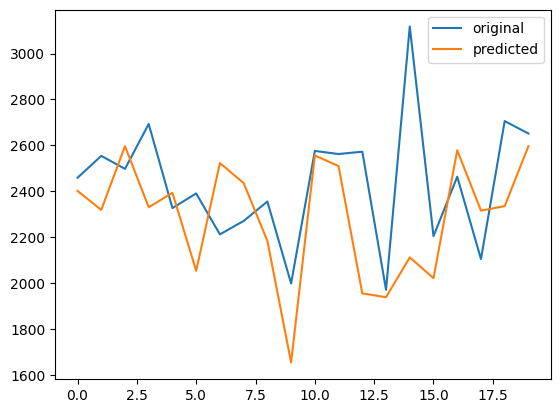

In [22]:
import matplotlib.pyplot as plt

n = 20
x_ax = range(n)
plt.plot(x_ax, y_test[:n], label='original')
plt.plot(x_ax, y_pred[:n], label= 'predicted')
plt.legend()
plt.show()

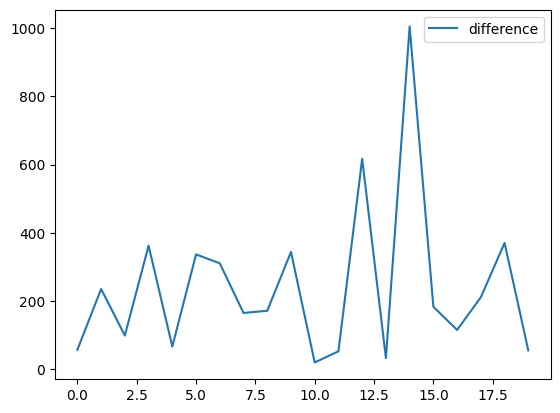

In [23]:
n=20
x_ax = range(n)
plt.plot(x_ax, diff[:n], label='difference')
plt.legend()
plt.show()

Actual test prediction

In [44]:
features_to_use = ['Relative Humidity', 'Temperature'] #cannot use datetime in training, since its not numerical!
input = df_demand_test[features_to_use]
predictions = bst.predict(input)

In [45]:
res = predictions.tolist()
res

[1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1735.060546875,
 1735.060546875,
 1735.060546875,
 1726.678955078125,
 1830.33251953125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1830.33251953125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1726.678955078125,
 1735.060546875,
 1735.060546875,
 1881.88525390625,
 1881.88525390625,
 1881.88525390625,
 1881.88525390625,
 1881.88525390625,
 2137.573486328125,
 1949.7353515625,
 1949.7353515625,
 1949.7353515625,
 1949.7353515625,
 1949.7353515625,
 1923.8687744140625,
 1923.8687744140625,
 1923.8687744140625,
 1893.391845703125,
 1899.2637939453125,
 1899.2637939453125,
 1893.391845703125,
 2093.371826171875,
 1893.391845703125,
 1893.391845703125,
 1957.9

In [55]:
df_results = pd.DataFrame()
df_results['datetime'] = df_demand_test['datetime'].copy()  # Copy the 'datetime' column
# df_results['Prediction'] = res
# df_results['Test'] = range(len(df_results))

In [56]:
# res_series = pd.Series(res)
df_results['Prediction'] = res


In [57]:
print(df_results)

                  datetime   Prediction
117028 2021-10-11 06:10:00  1726.678955
117029 2021-10-11 06:15:00  1726.678955
117030 2021-10-11 06:20:00  1726.678955
117031 2021-10-11 06:25:00  1726.678955
117032 2021-10-11 06:30:00  1726.678955
...                    ...          ...
136759 2021-12-13 17:30:00  1899.107544
136760 2021-12-13 17:35:00  1899.107544
136761 2021-12-13 17:40:00  1899.107544
136762 2021-12-13 17:45:00  1899.107544
136763 2021-12-13 17:50:00  1869.812378

[19736 rows x 2 columns]


In [64]:
df_results.to_csv(f"results_{'_'.join(features_to_use)}.csv")